In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from ydata_profiling import ProfileReport
import seaborn as sns
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('Mall_Customers.csv')
df = pd.DataFrame(df)
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [42]:
'''The numerical variables have been normalized to values between 0 and 1 here'''

num = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = MinMaxScaler()
df[num] = scaler.fit_transform(df[num])
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,0.387755
1,2,Male,0.057692,0.000000,0.816327
2,3,Female,0.038462,0.008197,0.051020


In [44]:
'''K-Means Clustering with elbow method using Scikit-learn'''
wcss = []
num_k = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)
    num_k.append(k)

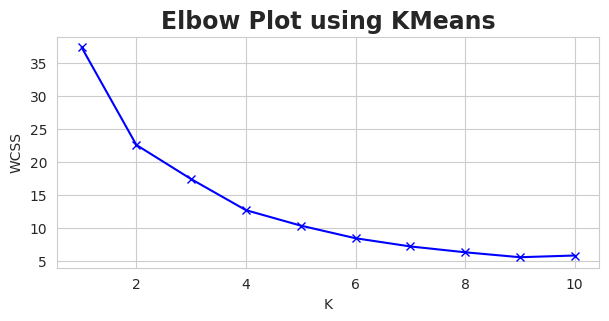

In [45]:
# Plot Elbow plot
plt.figure(figsize=(7, 3))
plt.plot(num_k, wcss, 'bx-')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.title('Elbow Plot using KMeans', fontsize=17, fontweight='bold')
plt.show()

In [48]:
'''Initialization using K-Means++'''

x = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

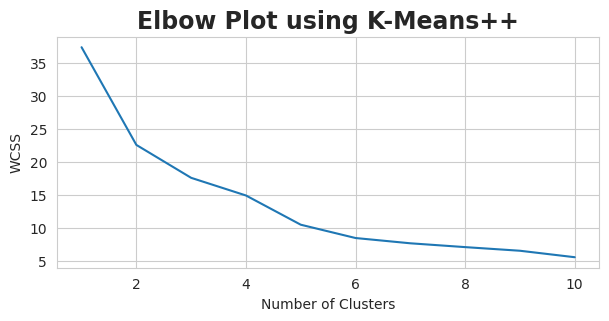

In [49]:
# Plot WCSS values against number of clusters
plt.figure(figsize=(7, 3))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Plot using K-Means++', fontsize=17, fontweight='bold')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

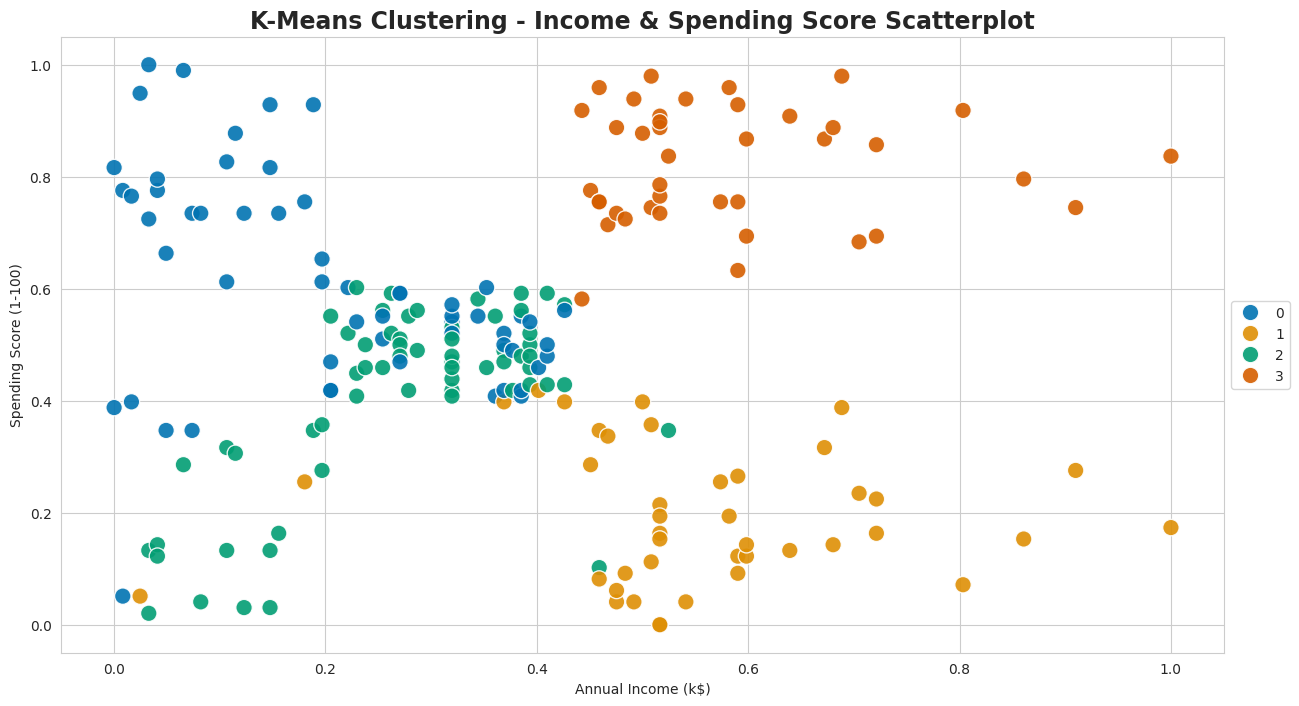

In [50]:
'''Optimal : k = 4'''

kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Add cluster labels to original df
df['Cluster'] = kmeans.labels_


sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))

# Plot clusters
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster', palette='colorblind', alpha=0.9, s=140)
plt.title('K-Means Clustering - Income & Spending Score Scatterplot', fontsize=17, fontweight='bold')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

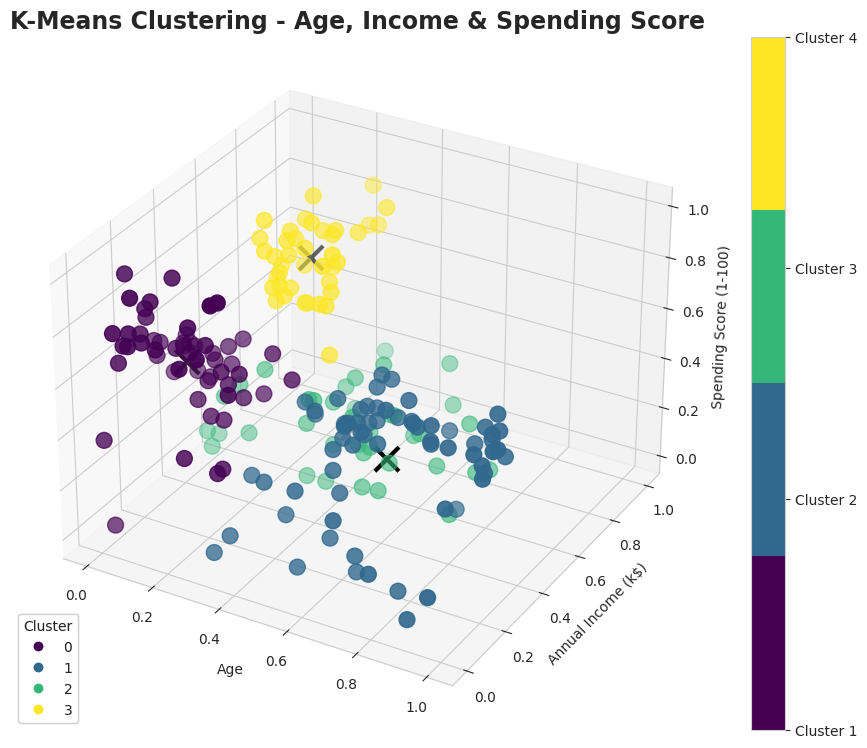

In [51]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df['Cluster'] = kmeans.labels_

# Set style 
sns.set_style('whitegrid')
fig = plt.figure(figsize=(12, 9))
my_cmap = plt.cm.get_cmap('viridis', 4)

# Create 3D scatter plot 
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], s=130, cmap=my_cmap)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Cluster")
ax.add_artist(legend1)
cbar = plt.colorbar(scatter)
cbar.set_ticks(np.arange(0, 4))
cbar.set_ticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('K-Means Clustering - Age, Income & Spending Score', fontsize=17, fontweight='bold')

# Plot centroids
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=300, linewidths=3, color='black', zorder=10)
plt.show()

Cluster 4 (Yellow) : younger on average and have both high incomes and high spending scores.  They are already high-spending and given their age their incomes (and purchasing power) are likely to increase further.  
Cluster 2 (Blue) : are also young with relatively high spending scores, but less income.   
Cluster 3 (Green) : little younger and have higher incomes.     
Cluster 1 (Purple) : mostly consists of older customers (on average) with more moderate income and spending scores. They are likely to be focused on practicality, convenience and value. They may be less likely to be influenced by trends. Marketing strategies for this group could include highlighting the convenience and ease of use of products, offering bundled or subscription-based services, and building loyalty through personalised service and rewards programs.  

In [36]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,0.019231,0.000000,0.387755,3
1,2,Male,0.057692,0.000000,0.816327,3
2,3,Female,0.038462,0.008197,0.051020,3
3,4,Female,0.096154,0.008197,0.775510,3
4,5,Female,0.250000,0.016393,0.397959,3
...,...,...,...,...,...,...
195,196,Female,0.326923,0.860656,0.795918,0
196,197,Female,0.519231,0.909836,0.275510,2
197,198,Male,0.269231,0.909836,0.744898,0
198,199,Male,0.269231,1.000000,0.173469,2


In [52]:
centroids = kmeans.cluster_centers_
print(centroids)

[[0.14304993 0.20491803 0.60508414]
 [0.69201183 0.26809584 0.39764521]
 [0.41093117 0.58606557 0.1895811 ]
 [0.28605769 0.58278689 0.82168367]]


In [53]:
# Calculate silhouette score
silhouette_avg = silhouette_score(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], kmeans.labels_)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.392319202055722


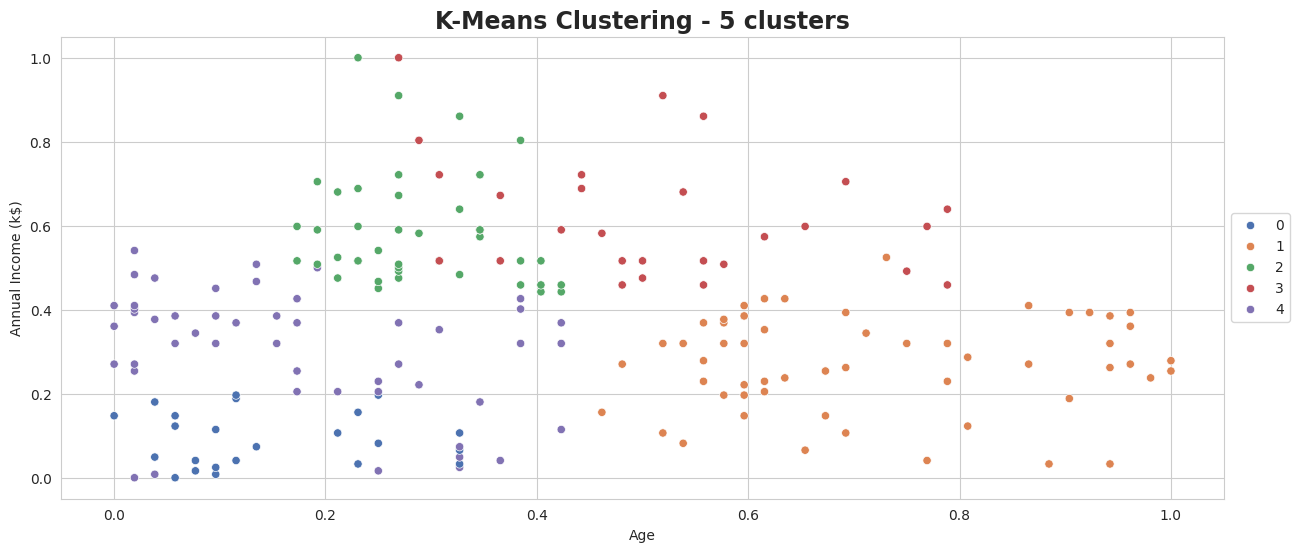

In [54]:
'''Comparison with k = 5'''

y = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(y)
df['Cluster'] = kmeans.labels_

sns.set_style('whitegrid')
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='deep')
plt.title('K-Means Clustering - 5 clusters', fontsize=17, fontweight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [55]:
silhouette_avg = silhouette_score(y, kmeans.labels_)
print("The average silhouette score for the clustering with", k, "clusters is:", silhouette_avg)

The average silhouette score for the clustering with 5 clusters is: 0.40611743307078185
